<hr>

# 🤖 MACHINE LEARNING 🤖

<style>
h1 {
    text-align: center;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<hr>

```text
MACHINE LEARNING STEPS:
1️⃣ PREPROCESSING
2️⃣ TRAINING
3️⃣ EVALUATION
4️⃣ IMPROVEMENT
#️⃣ DEPLOYMENT
```
---
```text
PREPROCESSING:
0️⃣ Load dataset
1️⃣ Split dataset into train and test
2️⃣ Fit preprocessing (encoding/scaling) on training set only
3️⃣ Transform both training and test sets
4️⃣ Train model on processed training data
5️⃣ Evaluate on processed test data
```


<hr>

### 🧰 INSTALLs


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: red;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

In [22]:
# install numpy and pandas if not already installed
#!pip install numpy pandas

# install xgboost if not already installed
#!pip install xgboost

# install shap if not already installed
#!pip install shap

# install imbalanced-lear
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imbalanced-learn]



<hr>

### 📂 IMPORTs


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: red;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from xgboost import XGBClassifier

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

<hr>

# 1️⃣ DATA PREPARATION FOR ML


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

```text
This version:

✅ Splits first

✅ Uses stratification

✅ Handles categorical + numerical features properly

✅ Prevents data leakage

✅ Uses Pipeline + ColumnTransformer (professional way)

✅ Works safely with cross-validation
```

<hr>

## 🔻 STEP 0 — Load Dataset


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

For consistency with code:
- X = features without the target variable; drop the target variable "revenue" from the features
- y = target variable "revenue"; the target is already binary (True=1 or False=0) 


In [2]:
import pandas as pd
# load the clean dataset
df = pd.read_csv("../data/processed/online_shoppers_intention_01_standard.csv")
print("Dataset loaded successfully. Shape:", df.shape)
display(df.head())

Dataset loaded successfully. Shape: (12330, 18)


,admin,admin_duration,info,info_duration,prod_related,prod_related_duration,bounce_rate,exit_rate,page_value,special_day,month,os,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


---
### Convert Boolean columns to int for consistency in the DATAFRAME not CSV

In [3]:
# boolean columns
bool_cols = ["weekend", "revenue"]

# convert boolean columns to integers (0 and 1)
for col in bool_cols:
    df[col] = df[col].astype(int)

df.info() # check the data types


<class 'pandas.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   admin                  12330 non-null  int64  
 1   admin_duration         12330 non-null  float64
 2   info                   12330 non-null  int64  
 3   info_duration          12330 non-null  float64
 4   prod_related           12330 non-null  int64  
 5   prod_related_duration  12330 non-null  float64
 6   bounce_rate            12330 non-null  float64
 7   exit_rate              12330 non-null  float64
 8   page_value             12330 non-null  float64
 9   special_day            12330 non-null  float64
 10  month                  12330 non-null  str    
 11  os                     12330 non-null  int64  
 12  browser                12330 non-null  int64  
 13  region                 12330 non-null  int64  
 14  traffic_type           12330 non-null  int64  
 15  visitor_type 

---
### Check DataFrame
- Shape()
- Head()
- Info()
- Target distribution check (imbalanced 84%/16%)

In [4]:

# Display df DataFrame
print("DataFrame:")
display(df.head())
print("Shape:", df.shape[0], "rows and", df.shape[1], "columns\n")

# Display data types & missing values of each column in df
print("Data Types & Missing Values of Each Column:")
display(df.info())

# Loop through each column and print unique values
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique values ({len(unique_vals)}): {unique_vals}\n")

print(f"\nData types check:")
for col in df.columns:
    dtype = df[col].dtype
    unique_vals = df[col].nunique()
    print(f"  ➡️{col:<25} {str(dtype):<10} [{unique_vals}] unique values")


DataFrame:


,admin,admin_duration,info,info_duration,prod_related,prod_related_duration,bounce_rate,exit_rate,page_value,special_day,month,os,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


Shape: 12330 rows and 18 columns

Data Types & Missing Values of Each Column:
<class 'pandas.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   admin                  12330 non-null  int64  
 1   admin_duration         12330 non-null  float64
 2   info                   12330 non-null  int64  
 3   info_duration          12330 non-null  float64
 4   prod_related           12330 non-null  int64  
 5   prod_related_duration  12330 non-null  float64
 6   bounce_rate            12330 non-null  float64
 7   exit_rate              12330 non-null  float64
 8   page_value             12330 non-null  float64
 9   special_day            12330 non-null  float64
 10  month                  12330 non-null  str    
 11  os                     12330 non-null  int64  
 12  browser                12330 non-null  int64  
 13  region                 12330 non-null  

None

Column: admin
Unique values (27): [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]

Column: admin_duration
Unique values (3335): [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]

Column: info
Unique values (17): [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]

Column: info_duration
Unique values (1258): [  0.   120.    16.   ... 547.75 368.25 211.25]

Column: prod_related
Unique values (311): [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 10

<hr>

## ✂️ STEP 1 — train/test split (80/20%) Stratified


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

- Use `random_state`. Consider stratified k-fold cross-validation later.

✔ To prevent data leakage, Split BEFORE:
- Scaling
- Encoding
- SMOTE
- Feature selection



### Separate Features (X) and Target (y) & Define Train/Test sets
Using stratify to maintain class balance, we split the sets 80/20% as follow:
- Train set: X_train AND y_train
- Test set:  X_test  AND y_test

---
```text
split the data into train/test sets 
with stratification to maintain class balance

Train sets:
X_train    =     features for train
y_train    =     target for train (one column with 0s and 1s)

Test sets:
X_test     =     features for test
y_test     =     target for test (one column with 0s and 1s)
```

In [8]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop("revenue", axis=1)  # features without the target variable "revenue"
y = df["revenue"]               # target variable "revenue"

X_train, X_test, y_train, y_test = train_test_split(
    X,                  # features without the target variable "revenue"
    y,                  # target variable "revenue"
    test_size=0.2,      # 20% test set, 80% train set
    stratify=y,         # maintain class balance in splits
    random_state=42     # for reproducibility, we can choose any integer as the random state
)

print(70*"-")
print(f"Features=(X) and target=(y) separated. \nShapes:\nX =", X.shape, ", y =", y.shape)
print(70*"-")
print(f"Train/Test split completed. \nShapes: \nX_train = {X_train.shape}, y_train = {y_train.shape}, \nX_test = {X_test.shape}, y_test = {y_test.shape}")

display(X_train.head())
print(70*"-")
display(y_train.head())


----------------------------------------------------------------------
Features=(X) and target=(y) separated. 
Shapes:
X = (12330, 17) , y = (12330,)
----------------------------------------------------------------------
Train/Test split completed. 
Shapes: 
X_train = (9864, 17), y_train = (9864,), 
X_test = (2466, 17), y_test = (2466,)


,admin,admin_duration,info,info_duration,prod_related,prod_related_duration,bounce_rate,exit_rate,page_value,special_day,month,os,browser,region,traffic_type,visitor_type,weekend
4263,8,732.25,0,0.0,34,1345.755952,0.005128,0.013342,12.274195,0.8,May,3,3,3,2,Returning_Visitor,0
5905,0,0.00,0,0.0,4,157.200000,0.040000,0.100000,0.000000,0.0,Oct,1,8,3,1,Returning_Visitor,1
9434,0,0.00,0,0.0,4,42.000000,0.000000,0.050000,0.000000,0.0,Dec,2,10,1,2,Returning_Visitor,0
3505,2,338.00,0,0.0,17,1205.566667,0.012500,0.037500,19.236250,0.8,May,3,2,2,2,Returning_Visitor,0
2067,0,0.00,0,0.0,32,827.646212,0.000000,0.000587,54.676348,0.0,Mar,2,2,7,2,Returning_Visitor,0


----------------------------------------------------------------------


4263    0
5905    0
9434    0
3505    1
2067    1
Name: revenue, dtype: int64

---
### Define Feature Types: Numerical/Categorical Variables


In [9]:
from sklearn.preprocessing import OneHotEncoder

# --- Define Categorical Columns ---
categorical_cols = [
    "month",
    "os",
    "browser",
    "region",
    "traffic_type",
    "visitor_type"
]

# --- Define Numerical columns --- (everything else)
numerical_cols = [col for col in X.columns if col not in categorical_cols]

---
### Create Leakage-Safe Preprocessor

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ("cat_cols", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num_cols", StandardScaler(), numerical_cols)
    ]
)

---
### Preprocessing

In [11]:

from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding --------------------------------------------------------------------------
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Fit ONLY on training data to avoid data leakage
encoder.fit(X_train[categorical_cols])

# Transform train and test
X_train_encoded = encoder.transform(X_train[categorical_cols])
X_test_encoded  = encoder.transform(X_test[categorical_cols])

# Convert to DataFrame
encoded_cols = encoder.get_feature_names_out(categorical_cols)

X_train_encoded_df = pd.DataFrame(
    X_train_encoded,
    columns=encoded_cols,
    index=X_train.index
)

X_test_encoded_df = pd.DataFrame(
    X_test_encoded,
    columns=encoded_cols,
    index=X_test.index
)

# Combine Numerical + Encoded Categorical -------------------------------------------------------------
X_train = pd.concat(
    [X_train[numerical_cols], X_train_encoded_df],
    axis=1
)

X_test = pd.concat(
    [X_test[numerical_cols], X_test_encoded_df],
    axis=1
)


# Save Train/Test sets in CSVs Files ----------------------------------------------------------------------
X_train.to_csv("../data/processed/X_train.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
    
X_test.to_csv("../data/processed/X_test.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

print("Split train/test complete. Files saved successfully in ../data/processed/")

Split train/test complete. Files saved successfully in ../data/processed/


In [12]:
# samia split code
import pandas as pd

# Reload the (possibly overwritten) splits
y_train = pd.read_csv("../data/processed/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/processed/y_test.csv").values.ravel()

print("Train class distribution:")
print(pd.Series(y_train).value_counts())
print(pd.Series(y_train).value_counts(normalize=True))

print("\nTest class distribution:")
print(pd.Series(y_test).value_counts())
print(pd.Series(y_test).value_counts(normalize=True))

Train class distribution:
0    8338
1    1526
Name: count, dtype: int64
0    0.845296
1    0.154704
Name: proportion, dtype: float64

Test class distribution:
0    2084
1     382
Name: count, dtype: int64
0    0.845093
1    0.154907
Name: proportion, dtype: float64


<hr>

## 🧹 STEP 2 — Handle DATA LEAKAGE


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

Data leakage happens when:
- Information from the test set influences training
- Or when a feature contains **future information**
- Or when preprocessing is done **before splitting**

---

Very important:
- Remove post-event features
- Remove target proxies
- Remove ID-like features
- Check correlation with target
---


- Drop leakage features  (e.g., `page_value`). 
- Ensure no post-target info (variables) exists.
- Fit transformations only on training set.

Note:
- This step is more important than imbalance handling.
- This step can be done either before or right after the step 2 - train/test split.





<hr>

## 📊 STEP 2.5 — Distributions  ENTIRE / TRAIN / TEST


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

In [ ]:
import pandas as pd

# assign:  X_train,  X_test,  y_train,  y_test with CSV files

X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv").squeeze()  # convert to Series
    
X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv").squeeze()    # convert to Series

print(70*"-")

# calculate the class imbalance ratio for the training set 
# to use in XGBoost's scale_pos_weight parameter

# count number of 0s and 1s in training set
class_counts = y_train.value_counts()

ratio = class_counts[0] / class_counts[1]

print(f"Class imbalance ratio (negative:positive) in training set: {ratio:.2f}")
    # This ratio will be used in the XGBoost model to help it handle the class imbalance effectively.
    # A ratio greater than 1 indicates that the negative class (0) is more prevalent than the positive class (1),
    # which is common in many real-world datasets. 
    # By setting scale_pos_weight to this ratio, we can help XGBoost give more attention to the minority class during training.

print(70*"-")

# distribution ENTIRE dataset
print("Class distribution in entire dataset:")
print(pd.concat([y_train, y_test]).value_counts())

# percentage ENTIRE dataset
print(f"\nClass distribution percentages in entire dataset:")
print(pd.concat([y_train, y_test]).value_counts(normalize=True) * 100)

print(70*"-")

# distribution TRAIN set
print("Class distribution in training set:")
print(y_train.value_counts())

# percentage TRAIN set
print(f"\nClass distribution percentages in training set:")
print(y_train.value_counts(normalize=True) * 100)

print(70*"-")

# distribution TEST set
print("Class distribution in test set:")
print(y_test.value_counts())

# percentage TEST set
print(f"\nClass distribution percentages in test set:")
print(y_test.value_counts(normalize=True) * 100)

print(70*"-")

----------------------------------------------------------------------
Class imbalance ratio (negative:positive) in training set: 5.46
----------------------------------------------------------------------
Class distribution in entire dataset:
revenue
0    10422
1     1908
Name: count, dtype: int64

Class distribution percentages in entire dataset:
revenue
0    84.525547
1    15.474453
Name: proportion, dtype: float64
----------------------------------------------------------------------
Class distribution in training set:
revenue
0    8338
1    1526
Name: count, dtype: int64

Class distribution percentages in training set:
revenue
0    84.529603
1    15.470397
Name: proportion, dtype: float64
----------------------------------------------------------------------
Class distribution in test set:
revenue
0    2084
1     382
Name: count, dtype: int64

Class distribution percentages in test set:
revenue
0    84.509327
1    15.490673
Name: proportion, dtype: float64
------------------------

<hr>

## 🗄️ STEP 3 — Separate Num and Cat Features


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

This step should be done using a Pipeline.

Instead of manually:
- Encode
- Scale
- Then train

Use:
- ColumnTransformer
- Pipeline

This prevents leakage and keeps workflow clean.

---

**Models that need Scaling:** 
- Linear models (Logistic Regression, Ridge, Lasso, ElasticNet)
- Support Vector Machines (SVM)
- K-Nearest Neighbors (KNN)
- Neural Networks
- K-Means / distance-based algorithms

**Models that DO NOT need Scaling:** 
- Tree-based models (Decision Trees, Random Forest, XGBoost, LightGBM, CatBoost)



---
### Encode categorical variables (hot one encode / labeling if ordinal variable)

- OneHotEncoder (nominal)
- OrdinalEncoder (ordinal)
- Handle unknown categories
- Avoid label encoding for nominal variables

---
### Scale numerical variables (if needed)

scaling can be conditional per model.
- Required for:
    - Logistic Regression
    - SVM
    - KNN

- Not required for:
    - Decision Trees
    - Random Forest
    - XGBoost

<hr>

## ⚖️ STEP 4 — Handle CLASS IMBALANCE


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

Important decision!

Which to Use:
- SMOTE?
- Random under-sampling?
- class_weight?
- threshold tuning?

⚠️ VERY IMPORTANT:
Apply SMOTE only on training set inside cross-validation fold. Otherwise → leakage.

In [ ]:
class_weight='balanced'

---
### Option A — Use Class Weights (Most Standard & Clean) 

---
### Option B — Resampling (Use Carefully)

---
### Option C — Threshold Tuning (Often Overlooked) 

<hr>

# 2️⃣ TRAINING


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>


**Purpose** →  Train the selected algorithm on the training data to learn patterns and relationships between features and the target variable. 

- Use the Train-test split CSV files:  X_train , y_train , X _test ,  y_test .
- Train 2-3 Models


<hr>

### 🔻 Load raw Train/Test CSVs


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>
<hr>

In [8]:
import pandas as pd
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")   
y_train = pd.read_csv("../data/processed/y_train.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

<hr>

### ✏️ Define Models


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>
<hr>

Define models → Train on training set → Test on test set → Compare results

Logistic Regression → needs scaling

KNN → needs scaling

Decision Tree → no scaling

Random Forest → no scaling

<hr>

#### Logistic Regression


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>
<hr>

```text
Logistic Regression can handle class imbalance by setting class_weight='balanced',
which will automatically adjust weights inversely proportional to class frequencies.
```

---
Confusion Matrix reading:
```text
|[TN | FP]|
|[FN | TP]|

FN (False Negatives) → minority class missed
TP (True Positives) → minority correctly detected
If FN is still very high, then we adjust threshold next.


ROC AUC = Area Under the ROC Curve
It measures: How well the model ranks positive examples higher than negative ones.
Range:
    1.0 → perfect
    0.5 → random guessing
    < 0.5 → worse than random
Because our dataset is imbalanced, ROC AUC is better than accuracy.

Cross-Validation ROC AUC, Each number is: ROC AUC performance on one validation FOLD.

Generally:
    < 0.70 → naah
    0.70 → acceptable
    0.80 → good
    0.90 → excellent


Small standard deviation cv-std means: the model performs consistently across different subsets of data.
```
---

```text
Cross-validation ROC AUC → rehearsal performance
Test ROC AUC → final exam score

If they are similar → good generalization
If test is much lower → overfitting

- Accuracy tells you: “How many did I get right?”
- ROC AUC tells you: “How well do I rank classes?”
- PR AUC tells you: “How well do I detect the minority class?”

```

##### Logistic Regression Standard Scaler

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
import pandas as pd


# Load train/test CSVs
X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")

X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")


# Since y is a single-column dataframe, flatten it
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


# quick sanity check - train/test shape
print(70*"-")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(70*"-")

# check class balance
# 84% False vs 16% True imbalance
print(pd.Series(y_train).value_counts(normalize=True))
print(70*"-")


# 1️⃣ Scale (fit ONLY on training data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2️⃣ Define model
# random_state=42 (standard number no need to change it)
# max_iter=5000 (to not get error)
# class_weight="balanced" to fix class imbalance, Scikit-learn is internally adjusting weights
model = LogisticRegression(max_iter=5000,random_state=42,class_weight="balanced")

# 3️⃣ Train
model.fit(X_train, y_train)

# 4️⃣ Predict
y_pred = model.predict(X_test)

# 5️⃣ Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(70*"-")
print(confusion_matrix(y_test, y_pred))

print(70*"-")
# Get probabilities for positive class
y_prob = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

# ROC AUC / PR AUC 
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)
print(70*"-")

# MCC
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)
print(70*"-")

# -- StandardScaler pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        max_iter=5000,
        random_state=42,
        class_weight="balanced"
    ))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    pipeline,
    X_train,   # original (unscaled) X_train
    y_train,
    cv=cv,
    scoring="roc_auc"
)

print("Cross-validation ROC AUC scores:", cv_scores)
print("Cross-validation Mean:", np.mean(cv_scores))
print("Cross-validation Std:", np.std(cv_scores))

----------------------------------------------------------------------
(9864, 74) (9864,)
(2466, 74) (2466,)
----------------------------------------------------------------------
0    0.845296
1    0.154704
Name: proportion, dtype: float64
----------------------------------------------------------------------
Accuracy: 0.8361719383617194
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      2084
           1       0.48      0.74      0.58       382

    accuracy                           0.84      2466
   macro avg       0.71      0.80      0.74      2466
weighted avg       0.87      0.84      0.85      2466

----------------------------------------------------------------------
[[1780  304]
 [ 100  282]]
----------------------------------------------------------------------
ROC AUC: 0.8917607098712704
PR AUC: 0.6207191632991315
----------------------------------------------------------------------
MCC: 0.5035338689604254
-------------

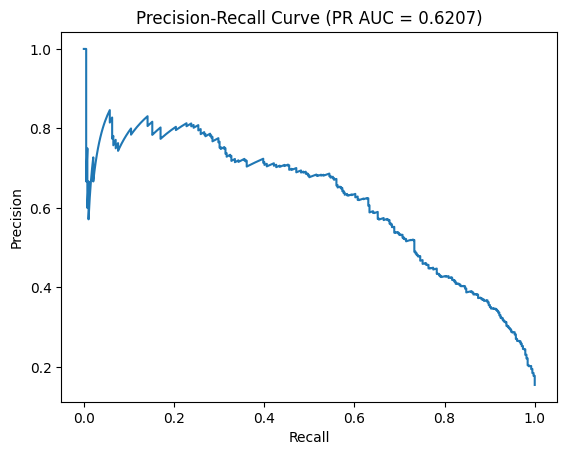

In [16]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (PR AUC = {pr_auc:.4f})")
plt.show()

In [10]:
# Flatten first
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Now check balance
print(pd.Series(y_train).value_counts(normalize=True))

0    0.845296
1    0.154704
Name: proportion, dtype: float64


Instead of using default 0.5 threshold:

y_prob = model.predict_proba(X_test)[:, 1]

Then choose a custom threshold:

y_pred_custom = (y_prob >= 0.3).astype(int)


- Lower threshold → higher recall
- Higher threshold → higher precision
This is often better than jumping to SMOTE immediately.

##### Logistic Regression Min Max Scaler

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd


# -----------------------------
# Load train/test CSVs
# -----------------------------
X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")

X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")


# Flatten target
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


# -----------------------------
# Sanity check
# -----------------------------
print(70*"-")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(70*"-")

print(pd.Series(y_train).value_counts(normalize=True))
print(70*"-")


# -----------------------------
# 1️⃣ Scale (fit ONLY on training data)
# -----------------------------
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# -----------------------------
# 2️⃣ Define model
# -----------------------------
model = LogisticRegression(
    max_iter=5000,
    random_state=42,
    class_weight="balanced"
)


# -----------------------------
# 3️⃣ Train
# -----------------------------
model.fit(X_train_scaled, y_train)


# -----------------------------
# 4️⃣ Predict
# -----------------------------
y_pred = model.predict(X_test_scaled)


# -----------------------------
# 5️⃣ Evaluate
# -----------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(70*"-")
print(confusion_matrix(y_test, y_pred))
print(70*"-")

# Probabilities
y_prob = model.predict_proba(X_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

print("Test ROC AUC:", roc_auc)
print("Test PR AUC:", pr_auc)
print(70*"-")

# MCC
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)
print(70*"-")


# -----------------------------
# 6️⃣ Cross-validation (ROC AUC)
# -----------------------------
pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ("model", LogisticRegression(
        max_iter=5000,
        random_state=42,
        class_weight="balanced"
    ))
])

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

cv_scores = cross_val_score(
    pipeline,
    X_train,   # raw training data
    y_train,
    cv=cv,
    scoring="roc_auc"
)

print("Cross-validation ROC AUC scores:", cv_scores)
print("Cross-validation Mean:", np.mean(cv_scores))
print("Cross-validation Std:", np.std(cv_scores))

----------------------------------------------------------------------
(9864, 74) (9864,)
(2466, 74) (2466,)
----------------------------------------------------------------------
0    0.845296
1    0.154704
Name: proportion, dtype: float64
----------------------------------------------------------------------
Accuracy: 0.8090024330900243
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      2084
           1       0.43      0.75      0.55       382

    accuracy                           0.81      2466
   macro avg       0.69      0.79      0.71      2466
weighted avg       0.87      0.81      0.83      2466

----------------------------------------------------------------------
[[1707  377]
 [  94  288]]
----------------------------------------------------------------------
Test ROC AUC: 0.8704251288802242
Test PR AUC: 0.5929614537597498
----------------------------------------------------------------------
MCC: 0.4671820187612777
---

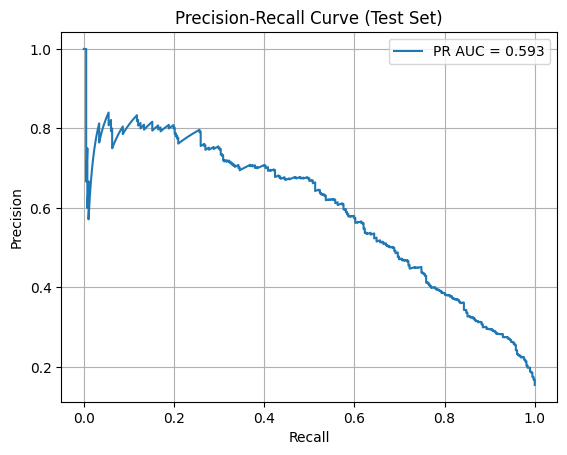

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute PR curve values
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Compute PR AUC
pr_auc = average_precision_score(y_test, y_prob)

# Plot
plt.figure()
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Test Set)")
plt.legend()
plt.grid()
plt.show()

<hr>

#### Linear SVM


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>
<hr>

```text
Linear SVM can handle class imbalance by setting class_weight='balanced', 
which will automatically adjust weights inversely proportional to class frequencies.

📌 Linear SVM — With SMOTE
✔ Powerful linear separator
✔ Balances the minority class
```

In [ ]:
svm_model = ImbPipeline([
    ("prep", preprocessor_scaled),
    ("smote", SMOTE(random_state=42)),
    ("model", SVC(
        kernel="linear",
        class_weight="balanced",
        probability=True,
        random_state=42
    ))
])

##### Linear SVM Standard Scaler

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Load train/test CSVs
X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")

X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

# Flatten y
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Quick sanity check
print(70*"-")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(70*"-")

# Check class balance
print(pd.Series(y_train).value_counts(normalize=True))
print(70*"-")

# 1️⃣ Scale (fit ONLY on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2️⃣ Define Linear SVM model
model = LinearSVC(
    C=1.0,
    class_weight="balanced",
    max_iter=5000,
    random_state=42
)

# 3️⃣ Train
model.fit(X_train_scaled, y_train)

# 4️⃣ Predict
y_pred = model.predict(X_test_scaled)

# 5️⃣ Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(70*"-")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(70*"-")

# 6️⃣ Decision scores for ROC / PR
y_scores = model.decision_function(X_test_scaled)

roc_auc = roc_auc_score(y_test, y_scores)
pr_auc = average_precision_score(y_test, y_scores)

print("Test ROC AUC:", roc_auc)
print("Test PR AUC:", pr_auc)
print(70*"-")

# MCC
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)
print(70*"-")

# 7️⃣ Cross-validation (ROC AUC) with Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearSVC(
        C=1.0,
        class_weight="balanced",
        max_iter=5000,
        random_state=42
    ))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring="roc_auc"
)

print("Cross-validation ROC AUC scores:", cv_scores)
print("Cross-validation Mean:", np.mean(cv_scores))
print("Cross-validation Std:", np.std(cv_scores))

----------------------------------------------------------------------
(9864, 74) (9864,)
(2466, 74) (2466,)
----------------------------------------------------------------------
0    0.845296
1    0.154704
Name: proportion, dtype: float64
----------------------------------------------------------------------
Accuracy: 0.8386050283860503
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      2084
           1       0.49      0.73      0.58       382

    accuracy                           0.84      2466
   macro avg       0.72      0.79      0.74      2466
weighted avg       0.87      0.84      0.85      2466

----------------------------------------------------------------------
Confusion Matrix:
[[1790  294]
 [ 104  278]]
----------------------------------------------------------------------
Test ROC AUC: 0.8878063731647757
Test PR AUC: 0.6146523357744829
----------------------------------------------------------------------
MCC: 0.50

In [38]:
print("Train class distribution:")
print(pd.Series(y_train).value_counts())

print("\nTest class distribution:")
print(pd.Series(y_test).value_counts())

Train class distribution:
0    8338
1    1526
Name: count, dtype: int64

Test class distribution:
0    2084
1     382
Name: count, dtype: int64


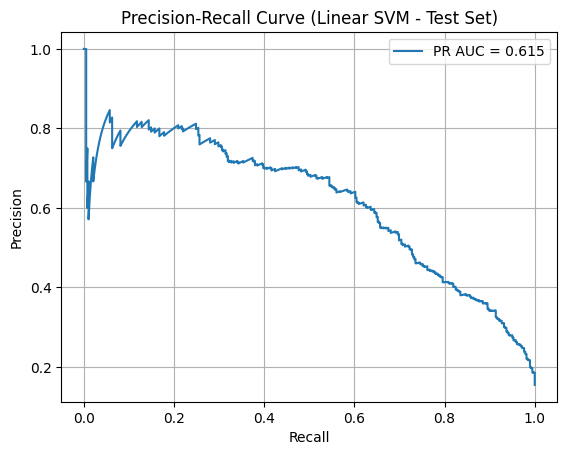

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall values
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute PR AUC
pr_auc = average_precision_score(y_test, y_scores)

# Plot
plt.figure()
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Linear SVM - Test Set)")
plt.legend()
plt.grid()
plt.show()

##### Linear SVM MinMax Scaler

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Load train/test CSVs
X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")

X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

# Flatten y
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Quick sanity check
print(70*"-")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(70*"-")

# Check class balance
print(pd.Series(y_train).value_counts(normalize=True))
print(70*"-")

# 1️⃣ Scale (fit ONLY on training data)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2️⃣ Define Linear SVM model
model = LinearSVC(
    C=1.0,
    class_weight="balanced",
    max_iter=5000,
    random_state=42
)

# 3️⃣ Train
model.fit(X_train_scaled, y_train)

# 4️⃣ Predict
y_pred = model.predict(X_test_scaled)

# 5️⃣ Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(70*"-")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(70*"-")

# 6️⃣ Decision scores for ROC / PR
y_scores = model.decision_function(X_test_scaled)

roc_auc = roc_auc_score(y_test, y_scores)
pr_auc = average_precision_score(y_test, y_scores)

print("Test ROC AUC:", roc_auc)
print("Test PR AUC:", pr_auc)
print(70*"-")

# MCC
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)
print(70*"-")

# 7️⃣ Cross-validation (ROC AUC) with Pipeline
pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ("model", LinearSVC(
        C=1.0,
        class_weight="balanced",
        max_iter=5000,
        random_state=42
    ))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring="roc_auc"
)

print("Cross-validation ROC AUC scores:", cv_scores)
print("Cross-validation Mean:", np.mean(cv_scores))
print("Cross-validation Std:", np.std(cv_scores))

----------------------------------------------------------------------
(9864, 74) (9864,)
(2466, 74) (2466,)
----------------------------------------------------------------------
0    0.845296
1    0.154704
Name: proportion, dtype: float64
----------------------------------------------------------------------
Accuracy: 0.8365774533657745
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      2084
           1       0.48      0.73      0.58       382

    accuracy                           0.84      2466
   macro avg       0.71      0.79      0.74      2466
weighted avg       0.87      0.84      0.85      2466

----------------------------------------------------------------------
Confusion Matrix:
[[1785  299]
 [ 104  278]]
----------------------------------------------------------------------
Test ROC AUC: 0.8853732250705953
Test PR AUC: 0.611198914798667
----------------------------------------------------------------------
MCC: 0.499

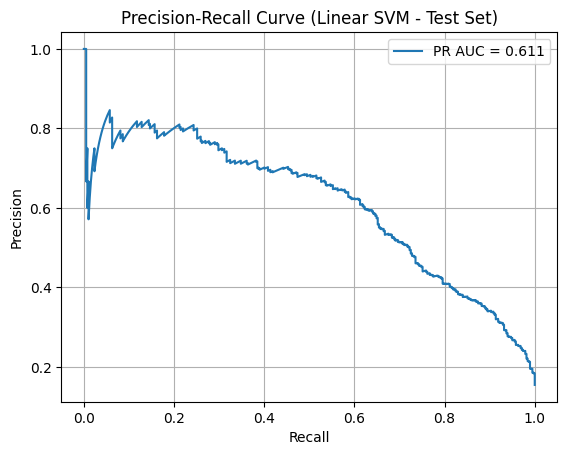

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute PR AUC
pr_auc = average_precision_score(y_test, y_scores)

# Plot
plt.figure()
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Linear SVM - Test Set)")
plt.legend()
plt.grid()
plt.show()

<hr>

#### KNN


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>
<hr>

```text
KNN doesn't have a built-in way to handle class imbalance, but it can still be effective.
We will use the preprocessor with scaling for KNN as well, since KNN is sensitive to feature scales.

📌 KNN — Weighted + SMOTE
✔ SMOTE + distance weighting helps KNN handle imbalance
⚠ Still weaker than tree methods but acceptable
```

In [ ]:
knn_model = ImbPipeline([
    ("prep", preprocessor_scaled),
    ("smote", SMOTE(random_state=42)),
    ("model", KNeighborsClassifier(
        n_neighbors=7,
        weights="distance"
    ))
])

##### KNN STANDARD SCALE

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Load train/test CSVs
X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")

X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

# Flatten y
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Quick sanity check
print(70*"-")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(70*"-")

# Check class balance
print(pd.Series(y_train).value_counts(normalize=True))
print(70*"-")

# 1️⃣ Scale (fit ONLY on training data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2️⃣ Define KNN model
model = KNeighborsClassifier(
    n_neighbors=5,   # you can tune this
    weights="distance"  # helps slightly with imbalance
)

# 3️⃣ Train
model.fit(X_train, y_train)

# 4️⃣ Predict
y_pred = model.predict(X_test)

# 5️⃣ Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(70*"-")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(70*"-")

# 6️⃣ Probabilities for positive class (Revenue=True → completed purchase)
y_prob = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)
print(70*"-")

# MCC
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)
print(70*"-")

# 7️⃣ Cross-validation (ROC AUC) with Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier(
        n_neighbors=5,
        weights="distance"
    ))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    pipeline,
    X_train,   # original unscaled data
    y_train,
    cv=cv,
    scoring="roc_auc"
)

print("Cross-validation ROC AUC scores:", cv_scores)
print("Cross-validation Mean:", np.mean(cv_scores))
print("Cross-validation Std:", np.std(cv_scores))

----------------------------------------------------------------------
(9864, 74) (9864,)
(2466, 74) (2466,)
----------------------------------------------------------------------
0    0.845296
1    0.154704
Name: proportion, dtype: float64
----------------------------------------------------------------------
Accuracy: 0.8507704785077048
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2084
           1       0.55      0.21      0.30       382

    accuracy                           0.85      2466
   macro avg       0.71      0.59      0.61      2466
weighted avg       0.82      0.85      0.82      2466

----------------------------------------------------------------------
Confusion Matrix:
[[2019   65]
 [ 303   79]]
----------------------------------------------------------------------
ROC AUC: 0.6982858678940017
PR AUC: 0.36482063273246795
----------------------------------------------------------------------
MCC: 0.27097730409

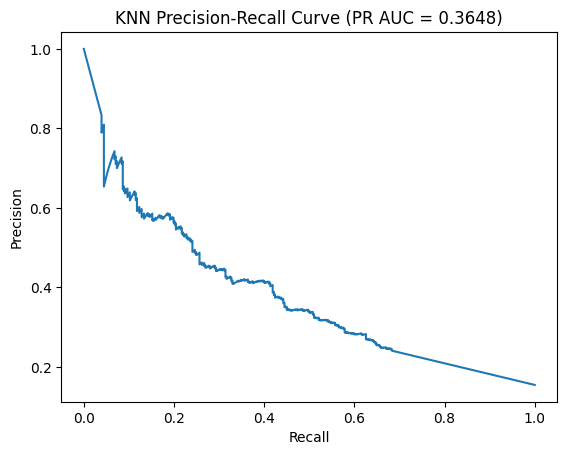

PR AUC: 0.36482063273246795


In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Predict probabilities for positive class (Revenue=True → completed purchase)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

# Plot (single plot, no custom colors)
plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"KNN Precision-Recall Curve (PR AUC = {pr_auc:.4f})")
plt.show()

print("PR AUC:", pr_auc)

##### KNN MIN MAX SCALER

In [24]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    roc_auc_score,
    average_precision_score,
    matthews_corrcoef
)
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# -----------------------------
# Load train/test CSVs
# -----------------------------
X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")

X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

# Flatten target
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# -----------------------------
# Sanity checks
# -----------------------------
print(70*"-")
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print(70*"-")

print("Class balance (train):")
print(pd.Series(y_train).value_counts(normalize=True))
print(70*"-")

# -----------------------------
# 1️⃣ Scaling (fit ONLY on training data)
# -----------------------------
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 2️⃣ Define KNN model
# -----------------------------
model = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance"
)

# -----------------------------
# 3️⃣ Train
# -----------------------------
model.fit(X_train_scaled, y_train)

# -----------------------------
# 4️⃣ Predict
# -----------------------------
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# -----------------------------
# 5️⃣ Evaluation
# -----------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(70*"-")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(70*"-")

# ROC AUC / PR AUC
roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

print("Test ROC AUC:", roc_auc)
print("Test PR AUC:", pr_auc)
print(70*"-")

# MCC
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)
print(70*"-")

# -----------------------------
# 6️⃣ Cross-validation (ROC AUC)
# -----------------------------
pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ("model", KNeighborsClassifier(
        n_neighbors=5,
        weights="distance"
    ))
])

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

cv_scores = cross_val_score(
    pipeline,
    X_train,     # raw training data
    y_train,
    cv=cv,
    scoring="roc_auc"
)

print("Cross-validation ROC AUC scores:", cv_scores)
print("Cross-validation Mean:", np.mean(cv_scores))
print("Cross-validation Std:", np.std(cv_scores))

----------------------------------------------------------------------
Train shape: (9864, 74) (9864,)
Test shape: (2466, 74) (2466,)
----------------------------------------------------------------------
Class balance (train):
0    0.845296
1    0.154704
Name: proportion, dtype: float64
----------------------------------------------------------------------
Accuracy: 0.8304947283049473
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2084
           1       0.39      0.17      0.24       382

    accuracy                           0.83      2466
   macro avg       0.63      0.56      0.57      2466
weighted avg       0.79      0.83      0.80      2466

----------------------------------------------------------------------
Confusion Matrix:
[[1983  101]
 [ 317   65]]
----------------------------------------------------------------------
Test ROC AUC: 0.6686440443770035
Test PR AUC: 0.2984957518342573
--------------------------------

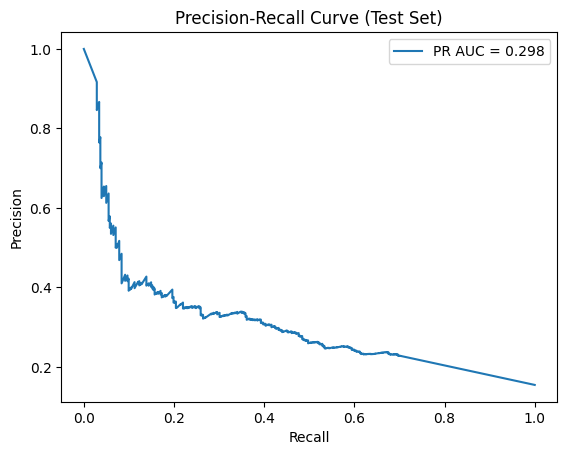

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

plt.figure()
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Test Set)")
plt.legend()
plt.show()

<hr>

#### Decision Tree


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>
<hr>

```text
Decision Tree can handle class imbalance by setting class_weight='balanced',
which will automatically adjust weights inversely proportional to class frequencies.

📌 Decision Tree — Balanced + SMOTE
✔ Handles imbalance with class weights and SMOTE
✔ Controlled depth to reduce overfitting
```

In [ ]:
dt_model = ImbPipeline([
    ("prep", preprocessor_tree),
    ("smote", SMOTE(random_state=42)),
    ("model", DecisionTreeClassifier(
        class_weight="balanced",
        max_depth=8,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42
    ))
])

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

# Load train/test CSVs
X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")

X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

# Flatten y
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Quick sanity check
print(70*"-")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(70*"-")

# Check class balance
print(pd.Series(y_train).value_counts(normalize=True))
print(70*"-")

# 1️⃣ Define Decision Tree model
model = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced",   # helps with 84/16 imbalance
    max_depth=None             # you can tune this later
)

# 2️⃣ Train
model.fit(X_train, y_train)

# 3️⃣ Predict
y_pred = model.predict(X_test)

# 4️⃣ Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(70*"-")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(70*"-")

# 5️⃣ Probabilities for positive class (completed purchase)
y_prob = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)
print(70*"-")

# MCC
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)
print(70*"-")

# 6️⃣ Cross-validation (ROC AUC)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=cv,
    scoring="roc_auc"
)

print("Cross-validation ROC AUC scores:", cv_scores)
print("Cross-validation Mean:", np.mean(cv_scores))
print("Cross-validation Std:", np.std(cv_scores))

----------------------------------------------------------------------
(9864, 74) (9864,)
(2466, 74) (2466,)
----------------------------------------------------------------------
0    0.845296
1    0.154704
Name: proportion, dtype: float64
----------------------------------------------------------------------
Accuracy: 0.85117599351176
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2084
           1       0.52      0.51      0.52       382

    accuracy                           0.85      2466
   macro avg       0.72      0.71      0.71      2466
weighted avg       0.85      0.85      0.85      2466

----------------------------------------------------------------------
Confusion Matrix:
[[1903  181]
 [ 186  196]]
----------------------------------------------------------------------
ROC AUC: 0.713118398970968
PR AUC: 0.34217763432502185
----------------------------------------------------------------------
MCC: 0.42854021607544

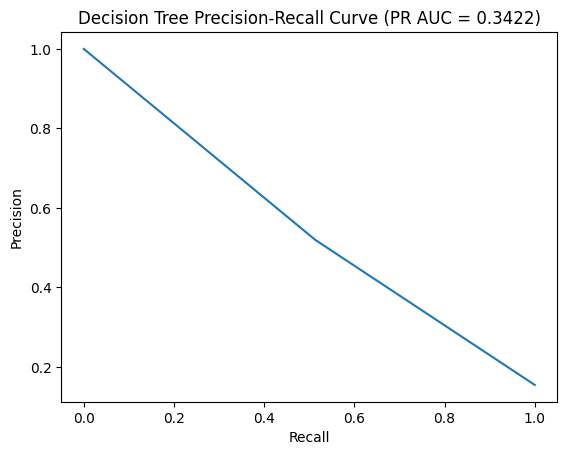

PR AUC: 0.34217763432502185


In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Predict probabilities for positive class (Revenue = True → completed purchase)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

# Plot (single plot, no custom colors)
plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Decision Tree Precision-Recall Curve (PR AUC = {pr_auc:.4f})")
plt.show()

print("PR AUC:", pr_auc)

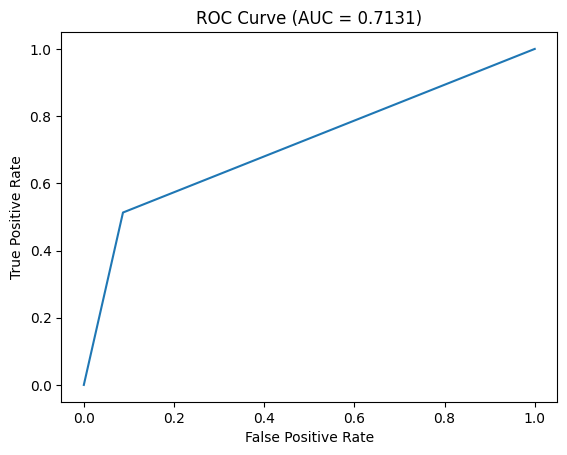

ROC AUC: 0.713118398970968


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for positive class (Revenue = True → completed purchase)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot (single plot, no custom colors)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc:.4f})")
plt.show()

print("ROC AUC:", roc_auc)

<hr>

#### Random Forest


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>
<hr>

```text
Random Forest can handle class imbalance by setting class_weight='balanced', 
which will automatically adjust weights inversely proportional to class frequencies.

📌 Random Forest — Strong for Imbalanced Data
🔥 Good default choice for this dataset
✔ Balances classes with SMOTE
✔ Tree-based instability controlled
```

In [ ]:
rf_model = ImbPipeline([
    ("prep", preprocessor_tree),
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(
        n_estimators=300,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    ))
])

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Load train/test CSVs
X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")

X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

# Flatten y
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Quick sanity check
print(70*"-")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(70*"-")

# Check class balance
print(pd.Series(y_train).value_counts(normalize=True))
print(70*"-")

# 1️⃣ Define Random Forest model
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

# 2️⃣ Train
model.fit(X_train, y_train)

# 3️⃣ Predict
y_pred = model.predict(X_test)

# 4️⃣ Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(70*"-")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(70*"-")

# 5️⃣ Probabilities for positive class (completed purchase)
y_prob = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)
print(70*"-")

# MCC
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)
print(70*"-")

# 6️⃣ Cross-validation (ROC AUC)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1
)

print("Cross-validation ROC AUC scores:", cv_scores)
print("Cross-validation Mean:", np.mean(cv_scores))
print("Cross-validation Std:", np.std(cv_scores))

y_train_prob = model.predict_proba(X_train)[:, 1]
train_roc = roc_auc_score(y_train, y_train_prob)
print("Train ROC AUC:", train_roc)

----------------------------------------------------------------------
(9864, 74) (9864,)
(2466, 74) (2466,)
----------------------------------------------------------------------
False    0.845296
True     0.154704
Name: proportion, dtype: float64
----------------------------------------------------------------------
Accuracy: 0.8933495539334956
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      2084
        True       0.75      0.46      0.57       382

    accuracy                           0.89      2466
   macro avg       0.83      0.72      0.76      2466
weighted avg       0.88      0.89      0.88      2466

----------------------------------------------------------------------
Confusion Matrix:
[[2026   58]
 [ 205  177]]
----------------------------------------------------------------------
ROC AUC: 0.918710619931465
PR AUC: 0.7141036112810702
----------------------------------------------------------------------
MCC: 0.53666

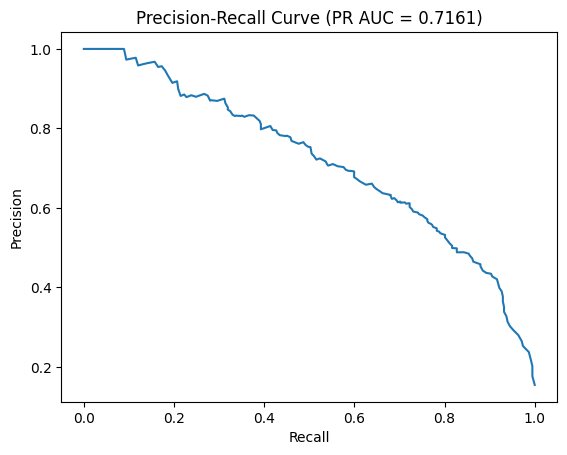

PR AUC: 0.716093804371283


In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Predict probabilities for positive class (Revenue = True → completed purchase)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

# Plot (single plot, no custom colors)
plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (PR AUC = {pr_auc:.4f})")
plt.show()

print("PR AUC:", pr_auc)

<hr>

#### XGBoost


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>
<hr>

```text
XGBoost has a built-in way to handle class imbalance using the scale_pos_weight parameter.

📌 XGBoost — Best Performance Potential
⭐ Typically the best performer on tabular, imbalanced tasks
✔ Combines SMOTE and XGBoost’s imbalance handling

Here, ratio should be computed as negatives/positives from your training set.
Example:
```
```python
ratio = (y_train == 0).sum() / (y_train == 1).sum()
```

In [ ]:
xgb_model = Pipeline([
    ("prep", preprocessor_tree),
    ("model", XGBClassifier(scale_pos_weight=ratio, eval_metric='logloss'))
])

----------------------------------------------------------------------
Train shape: (9864, 74) (9864,)
Test shape: (2466, 74) (2466,)
----------------------------------------------------------------------
Class balance:
0    0.845296
1    0.154704
Name: proportion, dtype: float64
----------------------------------------------------------------------
Accuracy: 0.8657745336577454
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.87      0.92      2084
           1       0.54      0.82      0.65       382

    accuracy                           0.87      2466
   macro avg       0.75      0.85      0.79      2466
weighted avg       0.90      0.87      0.88      2466

----------------------------------------------------------------------
Confusion Matrix:
[[1823  261]
 [  70  312]]
----------------------------------------------------------------------
Test ROC AUC: 0.929589442373205
Te

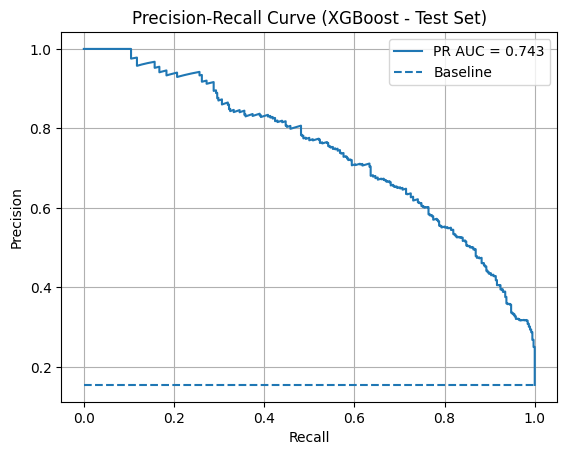

In [37]:
# =============================
# IMPORTS
# =============================
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    roc_auc_score,
    average_precision_score,
    matthews_corrcoef,
    precision_recall_curve
)
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# =============================
# LOAD DATA
# =============================
X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")

X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

# Flatten target
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# =============================
# SANITY CHECK
# =============================
print(70*"-")
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print(70*"-")

print("Class balance:")
print(pd.Series(y_train).value_counts(normalize=True))
print(70*"-")

# =============================
# HANDLE CLASS IMBALANCE
# =============================
neg = sum(y_train == 0)
pos = sum(y_train == 1)
scale_pos_weight = neg / pos

# =============================
# DEFINE MODEL
# =============================
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric="logloss"
)

# =============================
# TRAIN
# =============================
model.fit(X_train, y_train)

# =============================
# PREDICT
# =============================
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# =============================
# EVALUATION
# =============================
print("Accuracy:", accuracy_score(y_test, y_pred))
print(70*"-")
print(classification_report(y_test, y_pred))
print(70*"-")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(70*"-")

roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)
mcc = matthews_corrcoef(y_test, y_pred)

print("Test ROC AUC:", roc_auc)
print("Test PR AUC:", pr_auc)
print("MCC:", mcc)
print(70*"-")

# =============================
# CROSS-VALIDATION (ROC AUC)
# =============================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=cv,
    scoring="roc_auc"
)

print("Cross-validation ROC AUC scores:", cv_scores)
print("Cross-validation Mean:", np.mean(cv_scores))
print("Cross-validation Std:", np.std(cv_scores))
print(70*"-")

# =============================
# PR AUC CURVE PLOT (TEST SET)
# =============================
precision, recall, _ = precision_recall_curve(y_test, y_prob)
baseline = sum(y_test) / len(y_test)

plt.figure()
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.3f}")
plt.hlines(baseline, 0, 1, linestyles="dashed", label="Baseline")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (XGBoost - Test Set)")
plt.legend()
plt.grid()
plt.show()

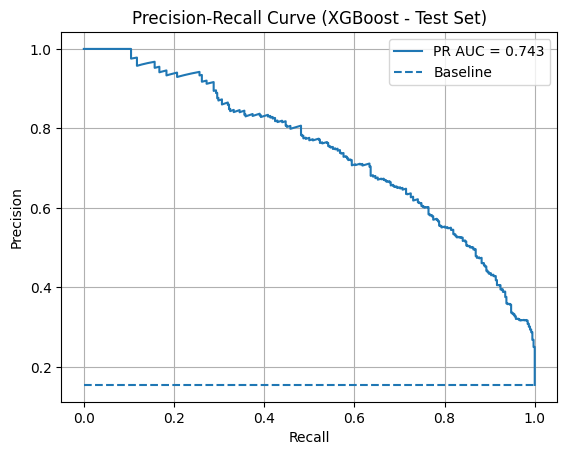

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Compute PR AUC
pr_auc = average_precision_score(y_test, y_prob)

# Baseline (positive class rate)
baseline = sum(y_test) / len(y_test)

# Plot
plt.figure()
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.3f}")
plt.hlines(baseline, 0, 1, linestyles="dashed", label="Baseline")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (XGBoost - Test Set)")
plt.legend()
plt.grid()
plt.show()

<hr>

#### AdaBoost


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>
<hr>

```text
AdaBoost doesn't have a built-in way to handle class imbalance, but it can still be effective. 
We will use the preprocessor without scaling for AdaBoost as well.

📌 AdaBoost — With SMOTE
✔ SMOTE greatly improves AdaBoost’s ability to learn minority class
```

In [ ]:
ada_model = ImbPipeline([
    ("prep", preprocessor_tree),
    ("smote", SMOTE(random_state=42)),
    ("model", AdaBoostClassifier(
        n_estimators=300,
        learning_rate=0.05,
        random_state=42
    ))
])

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

# -----------------------------
# Load train/test CSVs
# -----------------------------
X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")

X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

# Flatten target
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# -----------------------------
# Sanity check
# -----------------------------
print(70*"-")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(70*"-")

print(pd.Series(y_train).value_counts(normalize=True))
print(70*"-")

# -----------------------------
# Define AdaBoost model
# -----------------------------
base_tree = DecisionTreeClassifier(
    max_depth=1,        # decision stump (default for boosting)
    random_state=42
)

model = AdaBoostClassifier(
    estimator=base_tree,
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)

# -----------------------------
# Train
# -----------------------------
model.fit(X_train, y_train)

# -----------------------------
# Predict
# -----------------------------
y_pred = model.predict(X_test)

# -----------------------------
# Evaluate
# -----------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(70*"-")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(70*"-")

# Probabilities
y_prob = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

print("Test ROC AUC:", roc_auc)
print("Test PR AUC:", pr_auc)
print(70*"-")

# MCC
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)
print(70*"-")

# -----------------------------
# Cross-validation (ROC AUC)
# -----------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=cv,
    scoring="roc_auc"
)

print("Cross-validation ROC AUC scores:", cv_scores)
print("Cross-validation Mean:", np.mean(cv_scores))
print("Cross-validation Std:", np.std(cv_scores))

----------------------------------------------------------------------
(9864, 74) (9864,)
(2466, 74) (2466,)
----------------------------------------------------------------------
0    0.845296
1    0.154704
Name: proportion, dtype: float64
----------------------------------------------------------------------
Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2084
           1       0.66      0.57      0.62       382

    accuracy                           0.89      2466
   macro avg       0.79      0.76      0.78      2466
weighted avg       0.88      0.89      0.89      2466

----------------------------------------------------------------------
Confusion Matrix:
[[1973  111]
 [ 163  219]]
----------------------------------------------------------------------
Test ROC AUC: 0.9149403081066415
Test PR AUC: 0.6464100268692909
----------------------------------------------------------------------
MCC: 0.55

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

# -----------------------------
# Load train/test CSVs
# -----------------------------
X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")

X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

# Flatten target
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# -----------------------------
# Sanity check
# -----------------------------
print(70*"-")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(70*"-")

print(pd.Series(y_train).value_counts(normalize=True))
print(70*"-")

# -----------------------------
# Define AdaBoost model
# -----------------------------
base_tree = DecisionTreeClassifier(
    max_depth=1,        # decision stump (default for boosting)
    random_state=42
)

model = AdaBoostClassifier(
    estimator=base_tree,
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)

# -----------------------------
# Train
# -----------------------------
model.fit(X_train, y_train)

# -----------------------------
# Predict
# -----------------------------
y_pred = model.predict(X_test)

# -----------------------------
# Evaluate
# -----------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(70*"-")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(70*"-")

# Probabilities
y_prob = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

print("Test ROC AUC:", roc_auc)
print("Test PR AUC:", pr_auc)
print(70*"-")

# MCC
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)
print(70*"-")

# -----------------------------
# Cross-validation (ROC AUC)
# -----------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=cv,
    scoring="roc_auc"
)

print("Cross-validation ROC AUC scores:", cv_scores)
print("Cross-validation Mean:", np.mean(cv_scores))
print("Cross-validation Std:", np.std(cv_scores))

----------------------------------------------------------------------
(9864, 74) (9864,)
(2466, 74) (2466,)
----------------------------------------------------------------------
0    0.845296
1    0.154704
Name: proportion, dtype: float64
----------------------------------------------------------------------
Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2084
           1       0.66      0.57      0.62       382

    accuracy                           0.89      2466
   macro avg       0.79      0.76      0.78      2466
weighted avg       0.88      0.89      0.89      2466

----------------------------------------------------------------------
Confusion Matrix:
[[1973  111]
 [ 163  219]]
----------------------------------------------------------------------
Test ROC AUC: 0.9149403081066415
Test PR AUC: 0.6464100268692909
----------------------------------------------------------------------
MCC: 0.55

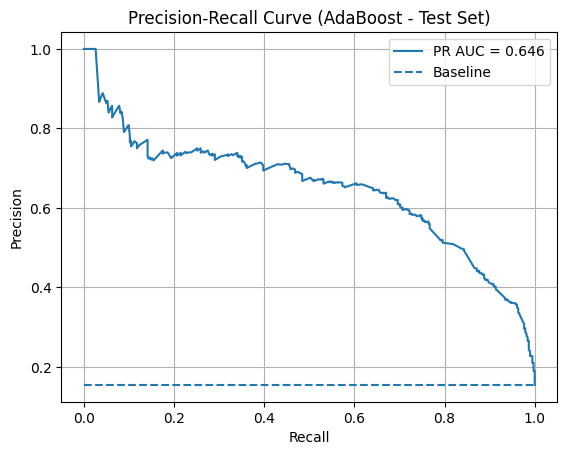

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Compute PR AUC
pr_auc = average_precision_score(y_test, y_prob)

# Baseline (positive class rate)
baseline = sum(y_test) / len(y_test)

# Plot
plt.figure()
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.3f}")
plt.hlines(baseline, 0, 1, linestyles="dashed", label="Baseline")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (AdaBoost - Test Set)")
plt.legend()
plt.grid()
plt.show()

<hr>

#### Models Dictonary


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>
<hr>

```text
Includes the following models:
 - Logistic Regression
 - Linear SVM
 - KNN
 - Decision Tree
 - Random Forest
 - XGBoost
 - AdaBoost
```

In [ ]:
models = {
    # model_name : model_function
    "Logistic Regression": log_reg_model,
    "Linear SVM": svm_model,
    "KNN": knn_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "AdaBoost": ada_model
}

print("Defined the following models:")
for model_name in models.keys():
    print(f" - {model_name}")

<hr>

# 3️⃣ EVALUATION


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

**Purpose** → Assess the model’s performance on unseen data and measure how well it generalizes.

**Notes:**
- For imbalanced classification: Do NOT rely on accuracy.
- Evaluate with ROC-AUC + F1 Score

**For Imbalanced Evaluation**
Use the following metrics instead of accuracy:
- ROC-AUC
- F1 score
- Recall (especially for positive class)
- Precision-Recall AUC

**MODEL EVALUATION METRICS:**
- Classification report (Precision, Recall, F1-score, Support)
- ROC-AUC / PR-AUC (especially important)
- ROC-Curve (Compare top 3 models)
- Confusion Matrix (TP, TN, FP, FN)
- Cross-validation (mean, std, MCC)
- Other relevant evaluation metrics (Accuracy, F2-score, AUC Curve)


---

Metrics reorder priority for Imbalanced Data:

- PR-AUC (more important than ROC-AUC)
- Recall / Precision (business-dependent)
- F1 or F2
- MCC (very strong metric)
- Confusion Matrix

Accuracy should be the least important.

<hr>

### 🧪 RUN ALL MODELS


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>
<hr>

In [ ]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    matthews_corrcoef,
    accuracy_score
)

# --- cross-validation ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# --- EVALUATION METRICS ---------------------
metrics = {
    
    # --- Classification Report metrics ---
    "precision": [],
    "recall": [],
    "f1_score": [],
    "f2_score": [],
    "support": [],
    
    # --- AUC metrics ---
    "roc_auc": [],
    "pr_auc": [],
    "roc_curve": [],
    
    # --- Confusion matrix ---
    "TP": [],
    "TN": [],
    "FP": [],
    "FN": [],
    
    # --- Cross-validation ---
    "cv_mean_auc": [],
    "cv_std_auc": [],
    "cv_mean_mcc": [],
    
    # --- Accuracy ---
    "accuracy": []
}


# model names list
model_names = list(models.keys())


# loop
for name, model in models.items():

    precision_list = []
    recall_list = []
    f1_list = []
    roc_list = []
    pr_list = []
    mcc_list = []
    accuracy_list = []

    tp_total = tn_total = fp_total = fn_total = 0

    for train_idx, test_idx in cv.split(X, y):

        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # ---- Store fold metrics ----
        precision_list.append(precision_score(y_test, y_pred))
        recall_list.append(recall_score(y_test, y_pred))
        f1_list.append(f1_score(y_test, y_pred))
        roc_list.append(roc_auc_score(y_test, y_proba))
        pr_list.append(average_precision_score(y_test, y_proba))
        mcc_list.append(matthews_corrcoef(y_test, y_pred))
        accuracy_list.append(accuracy_score(y_test, y_pred))

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        tp_total += tp
        tn_total += tn
        fp_total += fp
        fn_total += fn

    # ---- Store final averaged metrics ----
    metrics["precision"].append(np.mean(precision_list))
    metrics["recall"].append(np.mean(recall_list))
    metrics["f1_score"].append(np.mean(f1_list))
    metrics["f2_score"].append(np.mean([
        (5 * p * r) / (4 * p + r) if (4 * p + r) != 0 else 0
        for p, r in zip(precision_list, recall_list)
    ]))
    metrics["support"].append(np.sum(y == 1))

    metrics["roc_auc"].append(np.mean(roc_list))
    metrics["pr_auc"].append(np.mean(pr_list))
    metrics["roc_curve"].append(None)  # optional if not storing curves

    metrics["TP"].append(tp_total)
    metrics["TN"].append(tn_total)
    metrics["FP"].append(fp_total)
    metrics["FN"].append(fn_total)

    metrics["cv_mean_auc"].append(np.mean(roc_list))
    metrics["cv_std_auc"].append(np.std(roc_list))
    metrics["cv_mean_mcc"].append(np.mean(mcc_list))

    metrics["accuracy"].append(np.mean(accuracy_list))

<hr>

### 📉 ROC Curve (Compare top 3 models)


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>
<hr>

<hr>

# 4️⃣ IMPROVEMENT


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

**Purpose** → Optimize model performance and improve generalization by refining model settings and feature selection.


<hr>

### Adjust Decision Threshold


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>
<hr>

- **Instead of 0.5:**
- **This should improve recall.**

In [ ]:
# plot for adjusting decision threshold before and after 

<hr>

### Feature Importance Analysis


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>
<hr>

- **For RF / XGBoost: Use  `.feature_importances_`**

In [ ]:
import matplotlib.pyplot as plt

<hr>

### Feature Selection


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>
<hr>

<hr>

### Reducing overfitting or underfitting


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>
<hr>

<hr>

# 5️⃣ DEPLOYMENT


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

```text
Using Streamlit for an interface
Real Time Prediction
```

<hr>

# MODELS DEFINITONS & NOTES


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

---
#### NOTES
👉 Best model by ROC-AUC: XGBoost (0.9275)
- It has the highest ability to rank positive cases above negative cases.

⚠️ Is ROC-AUC enough for imbalanced data? Short answer: No, it is not enough.
- ROC-AUC can be misleading for imbalanced datasets because:
    - It evaluates performance across all classification thresholds.
    - It gives equal importance to True Positive Rate (TPR) and False Positive Rate (FPR).
    - When negatives heavily outnumber positives, the FPR can look artificially small, inflating ROC-AUC.
    - In highly imbalanced data, a model can achieve high ROC-AUC but still perform poorly at identifying the minority class.

🔎 For imbalanced datasets, prioritize:

1️⃣ Precision-Recall AUC (PR-AUC) ⭐ (Very Important)
- More informative when the positive class is rare.
- Focuses only on the positive class performance.

2️⃣ F1-score
- Harmonic mean of precision and recall.
- Good when you need balance between false positives and false negatives.

3️⃣ Recall (Sensitivity)
- Important if missing positives is costly (e.g., fraud, disease).

4️⃣ Confusion Matrix
- Shows actual classification behavior at your chosen threshold.

📊 Recommended Evaluation Metrics (Very Important)

Because the dataset is IMBALANCED:

✅ ROC-AUC
✅ Precision
✅ Recall
✅ F1-score
❌ Avoid relying only on accuracy

---
Order of modeling:
1. Logistic Regression (baseline)

2. Decision Tree

3. Random Forest

4. XGBoost

5. SVM

6. KNN

7. AdaBoost

---
🔬 Extra steps:
- Apply SMOTE before training
- Do feature importance comparison (RF vs XGBoost)
- Use cross-validation (StratifiedKFold)
- Plot ROC curves for all models

<hr>

## Basic / Linear Models


<style>
h1 {
    text-align: center;
    color: purple;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

<hr>

### 1️⃣ Logistic Regression 


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: red;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

- simple baseline for binary classification, interpretable.

**Why use it:**

- Strong baseline
- Interpretable (feature coefficients)
- Fast to train

**Tips for this dataset:**

- Use `class_weight='balanced'`
- Scale numeric features
- One-hot encode categorical features
- Evaluate with ROC-AUC and F1 (not accuracy)

<hr>

### 2️⃣ Linear SVM (Support Vector Machine)


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: red;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

- good when classes are separable in feature space.

**Why use it:**

- Good for high-dimensional feature space
- Works well with proper scaling

**Tips:**

- Must scale features (StandardScaler)
- Use `class_weight='balanced'`
- Tune `C` parameter

<hr>

## Instance-Based


<style>
h1 {
    text-align: center;
    color: purple;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

<hr>

### 3️⃣ K-Nearest Neighbors (KNN) 


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: red;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

- simple distance-based classifier.

**Why use it:**

- Simple non-parametric model
- Captures non-linear boundaries

**Tips:**

- Feature scaling is mandatory
- Tune `k` (start with 5–25)
- Can be slow on larger datasets
- Sensitive to irrelevant features

<hr>

## Tree-Based & Ensemble Methods


<style>
h1 {
    text-align: center;
    color: purple;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

<hr>

### 4️⃣ Decision Trees


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: red;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

- intuitive model, good for non-linear relationships.

**Why use it:**

- Handles non-linear relationships
- No need for feature scaling
- Easy to visualize

**Tune:**

- `max_depth`
- `min_samples_split`
- `min_samples_leaf`
- ⚠️ Can overfit — pruning is important.

<hr>

### 5️⃣ Random Forest


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: red;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

- ensemble of trees; strong baseline with good performance on tabular data.

Why use it:

- Excellent for tabular data
- Handles feature interactions well
- Less overfitting than single tree

Tune:

- `n_estimators`
- `max_depth`
- `max_features`

🔥 A strong baseline for this dataset.

<hr>

### 6️⃣ Gradient Boosting Machines


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: red;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

- powerful boosted trees for classification.

<hr>

#### #️⃣ MODEL 06.1: XGBoost


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: red;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: grey;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: left;
    color: normal;
    font-weight: bold;
}
</style>
<hr>

- boosting method using weighted weak learners.

(Technically Gradient Boosting, but very powerful)

**Why use it:**
- State-of-the-art for structured/tabular data
- Handles imbalance well
- Often best performer

**Tune:**
- `learning_rate`
- `n_estimators`
- `max_depth`
- `scale_pos_weight` (important for imbalance)

🔥 Frequently achieves highest ROC-AUC.

<hr>

#### #️⃣ MODEL 06.2: AdaBoost


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: red;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: left;
    color: grey;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: left;
    color: normal;
    font-weight: bold;
}
</style>
<hr>

- boosted trees that handle categorical features well.

**Why use it:**

- Boosting improves weak learners
- Simpler than XGBoost

**Tune:**
- `n_estimators`
- `learning_rate`

Usually performs better than a single tree but not as strong as Random Forest or XGBoost.